In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, fisher_exact, f, t
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
plt.style.use('ggplot')

In [3]:
eps = np.sort(np.array(norm(loc = 0, scale = 2).rvs(size = 40)))
alpha = 68.35
beta1 = -3.5
beta2 = 21.05

x1 = np.sort(np.array(norm(loc = 2.3, scale = 10).rvs(size = 40)))
x2 = np.sort(np.array(norm(loc = 10.5, scale = 3.55).rvs(size = 40)))

y = alpha + beta1 * x1 + beta2 * x2 + eps

In [4]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1, 1), y)

model2 = LinearRegression()
model2.fit(x2.reshape(-1, 1), y)

models = list()
models.append(model1)
models.append(model2)

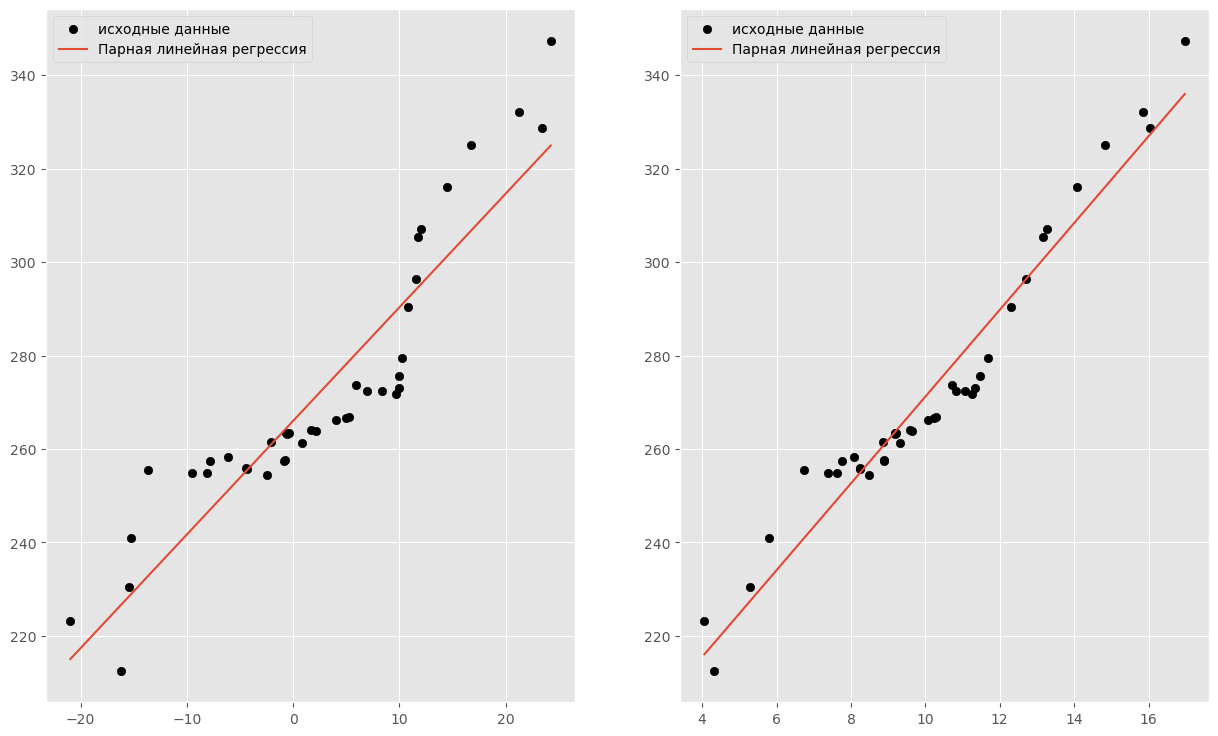

In [5]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(1, 2)

plt.subplot(gs[0])
plt.scatter(x1, y, color = 'black')
plt.plot(x1, model1.predict(x1.reshape(-1, 1)))
plt.legend(['исходные данные', 'Парная линейная регрессия'])

plt.subplot(gs[1])
plt.scatter(x2, y, color = 'black')
plt.plot(x2, model2.predict(x2.reshape(-1, 1)))
plt.legend(['исходные данные', 'Парная линейная регрессия'])

plt.show()

In [6]:
x = list()
x.append(x1)
x.append(x2)

for i in range(len(models)):
    print('Коэффициент {0}-ой линейной регрессии: {1}'.format(i + 1, models[i].coef_[0]))
    print('Свободный член {0}-ой линейной регрессии: {1}'.format(i + 1, models[i].intercept_))
    print('Коэффициент детерминации {0}-ой линейной регрессии: {1}'.format(i + 1, models[i].score(x[i].reshape(-1, 1), y)))
    print('Линейный коэффициент парной корреляции {0}-ой регрессии: {1}'.format(i + 1, pearsonr(x[i], y)[0]))
    print('Значение F-статистики {0}-ой линейной регрессии: {1}'.format(i + 1, (models[i].score(x[i].reshape(-1, 1), y)) / (1 - models[i].score(x[i].reshape(-1, 1), y)) * ((len(y) - 2))))
    print('Средняя ошибка аппроксимации {0}-ой линейной регрессии: {1}'.format(i + 1, np.sum(np.abs((y - models[i].predict(x[i].reshape(-1, 1))) / y)) / len(y)))
    print()



Коэффициент 1-ой линейной регрессии: 2.4307098209088083
Свободный член 1-ой линейной регрессии: 266.0305474912289
Коэффициент детерминации 1-ой линейной регрессии: 0.8519159414822183
Линейный коэффициент парной корреляции 1-ой регрессии: 0.9229929260195976
Значение F-статистики 1-ой линейной регрессии: 218.61101120777974
Средняя ошибка аппроксимации 1-ой линейной регрессии: 0.033634343554737454

Коэффициент 2-ой линейной регрессии: 9.285938129216959
Свободный член 2-ой линейной регрессии: 178.36348659349107
Коэффициент детерминации 2-ой линейной регрессии: 0.9499314407822718
Линейный коэффициент парной корреляции 2-ой регрессии: 0.9746442637097248
Значение F-статистики 2-ой линейной регрессии: 720.9593268452787
Средняя ошибка аппроксимации 2-ой линейной регрессии: 0.019728198589380824



Графики остатков первой линейной регрессии

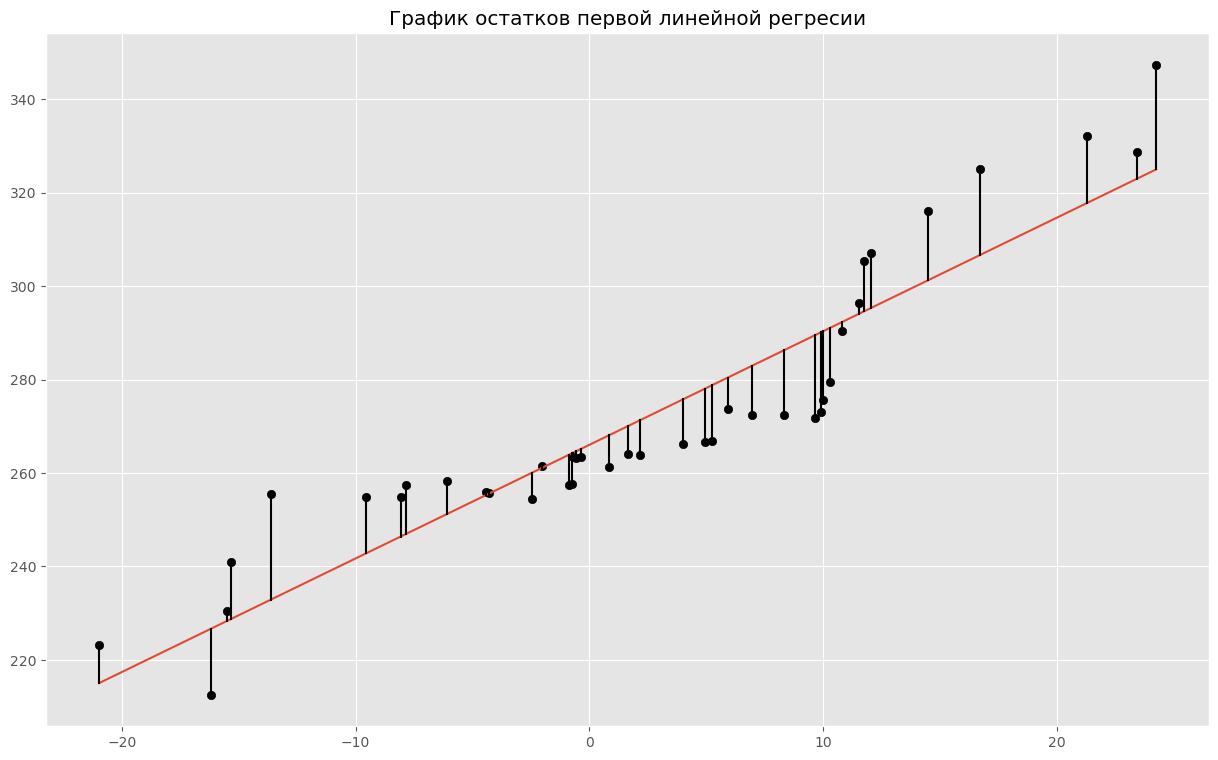

In [7]:
fig = plt.figure(figsize = (15, 9))

plt.plot(x[0], models[0].predict(x[0].reshape(-1, 1)))
plt.scatter(x[0], y, color = 'black')
for i in range(len(x[0])):
    plt.plot([x[0][i], x[0][i]], [y[i], models[0].coef_[0] * x[0][i] + models[0].intercept_], color = 'black')
plt.title('График остатков первой линейной регресии')
plt.show()

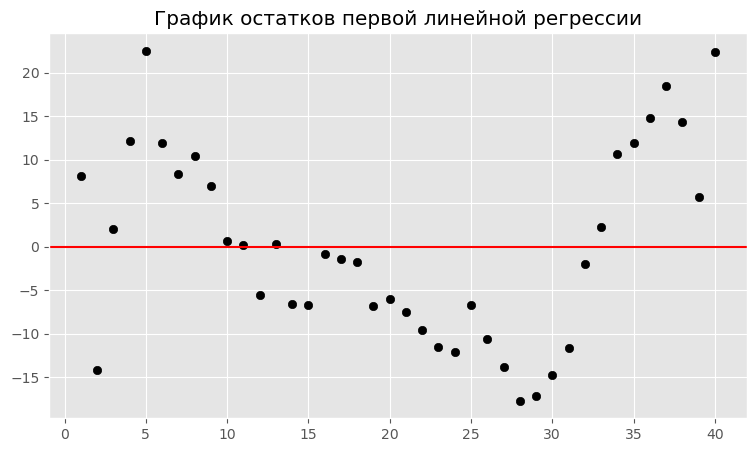

In [8]:
fig = plt.figure(figsize = (9, 5))

x_ost = list()
preds = models[0].predict(x[0].reshape(-1, 1))
for i in range(len(preds)):
    x_ost.append(y[i] - preds[i])

plt.scatter(np.linspace(1, len(y), len(y)), x_ost, color = 'black')
plt.axhline(0, color = 'red')
plt.title('График остатков первой линейной регрессии')
plt.show()

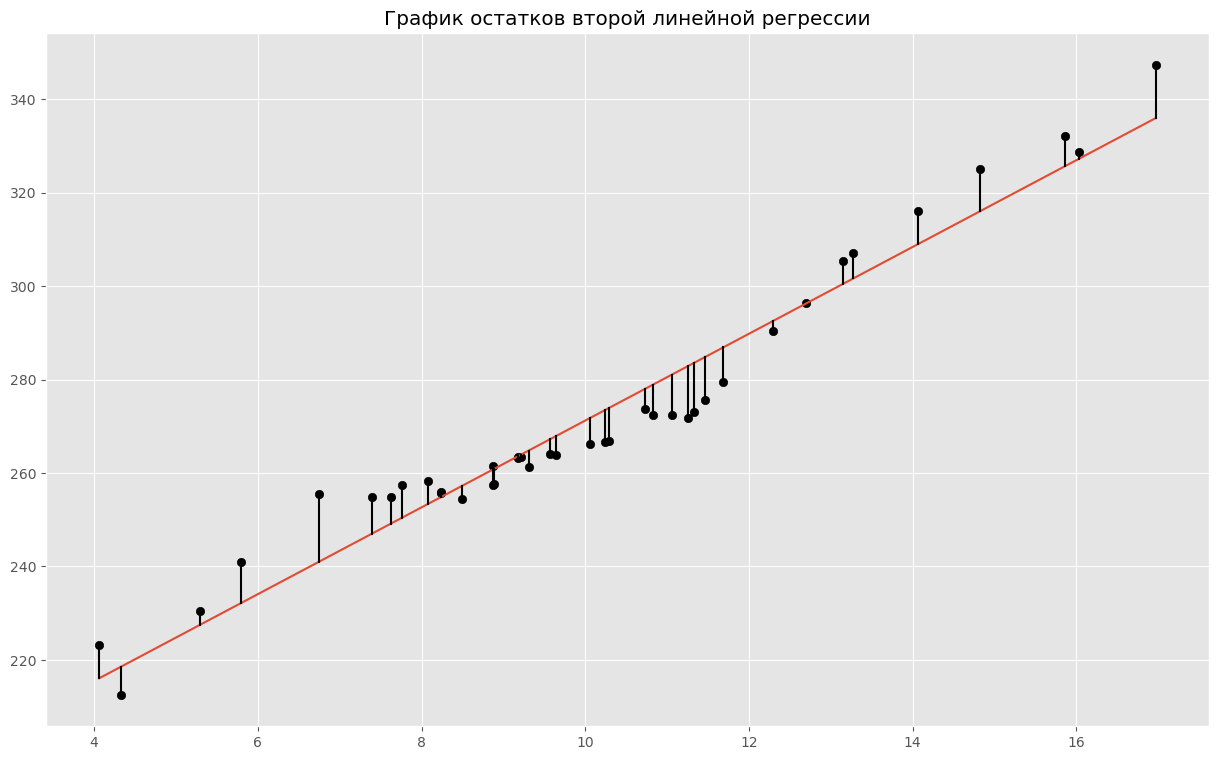

In [9]:
fig = plt.figure(figsize = (15, 9))

plt.plot(x[1], models[1].predict(x[1].reshape(-1, 1)))
plt.scatter(x[1], y, color = 'black')
for i in range(len(x[1])):
    plt.plot([x[1][i], x[1][i]], [y[i], models[1].coef_[0] * x[1][i] + models[1].intercept_], color = 'black')
plt.title('График остатков второй линейной регрессии')
plt.show()

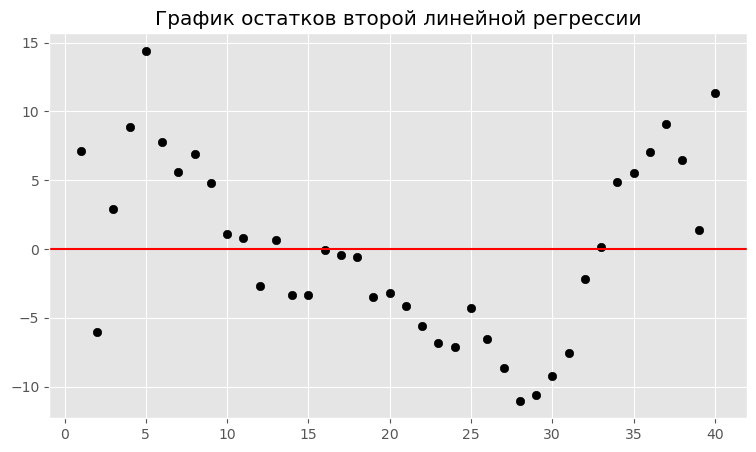

In [10]:
fig = plt.figure(figsize = (9, 5))

x_ost = list()
preds = models[1].predict(x[1].reshape(-1, 1))
for i in range(len(preds)):
    x_ost.append(y[i] - preds[i])

plt.scatter(np.linspace(1, len(y), len(y)), x_ost, color = 'black')
plt.axhline(0, color = 'red')
plt.title('График остатков второй линейной регрессии')
plt.show()

In [11]:
X = list()

for i in range(40):
    temp = list()
    temp.append(1)
    temp.append(x1[i])
    temp.append(x2[i])

    X.append(temp)

X = np.array(X) 

In [12]:
print(np.linalg.det(np.linalg.inv((X.T.dot(X)))))

5.265457133524489e-07


Коэффициенты уравнения множественной регрессии: [61.64850256 -3.48356437 21.70802942]


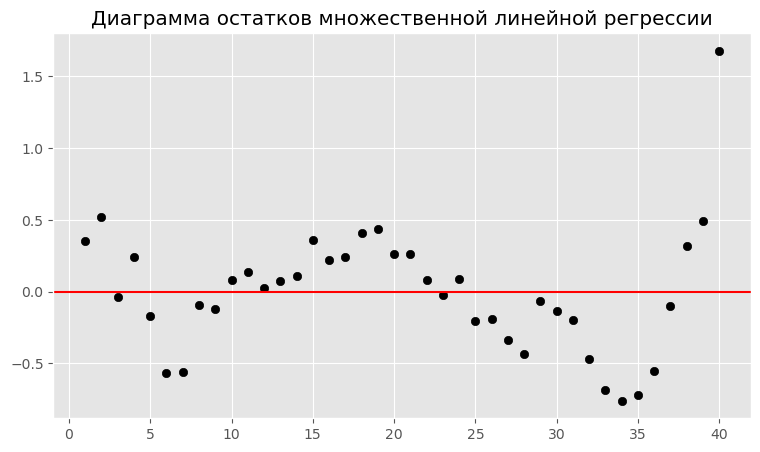

In [13]:
coefs = (np.linalg.inv((X.T.dot(X))).dot(X.T)).dot(y)
print('Коэффициенты уравнения множественной регрессии: {0}'.format(coefs))

fig = plt.figure(figsize = (9, 5))
x_ost = list()
preds = list()
for i in range(len(y)):
    y_ = coefs[0] + coefs[1] * x[0][i] + coefs[2] * x[1][i]
    preds.append(y_)
    x_ost.append(y[i] - y_)

plt.scatter(np.linspace(1, len(y), len(y)), x_ost, color = 'black')
plt.axhline(0, color = 'red')
plt.title('Диаграмма остатков множественной линейной регрессии')
plt.show()

In [14]:
preds = np.array(preds)
print('Средняя ошибка аппроксимации парной линейной регрессии: {0}'.format(np.sum(np.abs((y - preds) / y)) / len(y)))
print('Оценка для дисперсии остатков: {0}'.format(np.sum((y - preds) ** 2) / (len(y) - 3)))
print()
print('Множественный коэффициент детерминации: {0}'.format(1 - (np.sum((y - preds) ** 2) / np.sum((y - y.mean()) ** 2))))
print('Коэффициенты детерминации первой и второй регрессии: {0}, {1}'.format(models[0].score(x[0].reshape(-1, 1), y), models[1].score(x[1].reshape(-1, 1), y)))

Средняя ошибка аппроксимации парной линейной регрессии: 0.0011422233870065073
Оценка для дисперсии остатков: 0.2067689745182193

Множественный коэффициент детерминации: 0.9997638501996955
Коэффициенты детерминации первой и второй регрессии: 0.8519159414822183, 0.9499314407822718


In [18]:
alpha = 0.05
r2 = np.sum((y - preds) ** 2) / np.sum((y - y.mean()) ** 2)
f_ = (r2 / (1 - r2)) * ((len(y) - 3) / 3)

p_value = 2 * min(f.cdf(f_, 2, len(y) - 3), 1 - f.cdf(f_, 2, len(y) - 3))
if p_value < alpha:
    print('H0 отвергается, модель статистически значима')
else:
    print('H0 не отвергается, модель не признается статистически значимой')

H0 отвергается, модель статистически значима


In [22]:
print('Частный коэффициент корреляции r(yx1/x2): {0}'.format((pearsonr(y, x1)[0] - pearsonr(y, x2)[0] * pearsonr(x1, x2)[0]) / (np.sqrt((1 - pearsonr(y, x2)[0] ** 2) * (1 - pearsonr(x1, x2)[0] ** 2)))))
print('Частный коэффициент корреляции r(yx2/x1): {0}'.format((pearsonr(y, x2)[0] - pearsonr(y, x1)[0] * pearsonr(x2, x1)[0]) / (np.sqrt((1 - pearsonr(y, x1)[0] ** 2) * (1 - pearsonr(x2, x1)[0] ** 2)))))
print('Линейный коэффициент парной корреляции 1-ой регрессии: {0}'.format(pearsonr(x1, y)[0]))
print('Линейный коэффициент парной корреляции 2-ой регрессии: {0}'.format(pearsonr(x2, y)[0]))

Частный коэффициент корреляции r(yx1/x2): -0.9976389483296784
Частный коэффициент корреляции r(yx2/x1): 0.9992023313485063
Линейный коэффициент парной корреляции 1-ой регрессии: 0.9229929260195976
Линейный коэффициент парной корреляции 2-ой регрессии: 0.9746442637097248


In [23]:
s_rss = np.sqrt(np.sum((y - preds) ** 2) / (len(y) - 3))
X_h = np.linalg.inv(X.T.dot(X))

m_a = s_rss * np.sqrt(X_h[0][0])
m_b1 = s_rss * np.sqrt(X_h[1][1])
m_b2 = s_rss * np.sqrt(X_h[2][2])
print('Стандартные ошибки коэффициентов регрессии: {0}, {1}, {2}'.format(m_a, m_b1, m_b2))


Стандартные ошибки коэффициентов регрессии: 1.3448710598640936, 0.039424012726765885, 0.14262831049601574
